In [1]:
%cd "../fiberphotopy"

C:\Users\mceau\Documents\fiberphotopy\fiberphotopy


In [55]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import time
import random
from scipy import signal

import importlib
import fp_utils
import behavioral_data
import fiber_data
import analysis

def rel():
    importlib.reload(behavioral_data)
    importlib.reload(fiber_data)
    importlib.reload(analysis)
    importlib.reload(fp_utils)

In [56]:
AS21R = analysis.MultiSession('../../DATA/AS21R/')


Importing folder rat_10_SA_1...
Importing ../../DATA/AS21R//rat_10_SA_1/bsa02032022c20_01.dat...
Importing of ../../DATA/AS21R//rat_10_SA_1/bsa02032022c20_01.dat finished in 0.046961069107055664 seconds
Analyzing peaks...
Importing of ../../DATA/AS21R//rat_10_SA_1/AS21RSA1Rat1002032022_0.csv finished in 1.877265214920044 seconds

Importing folder rat_10_SA_2...
Importing ../../DATA/AS21R//rat_10_SA_2/bsa08032022c20_02.dat...
Importing of ../../DATA/AS21R//rat_10_SA_2/bsa08032022c20_02.dat finished in 0.04397463798522949 seconds
Analyzing peaks...
Importing of ../../DATA/AS21R//rat_10_SA_2/AS21RSA2Rat1008032022_0.csv finished in 1.0464015007019043 seconds

Importing folder rat_11_SA_1...
Importing ../../DATA/AS21R//rat_11_SA_1/bsa03032022c20_01.dat...
Importing of ../../DATA/AS21R//rat_11_SA_1/bsa03032022c20_01.dat finished in 0.042974233627319336 seconds
Analyzing peaks...
Importing of ../../DATA/AS21R//rat_11_SA_1/AS21RSA1Rat1103032022_0.csv finished in 1.801922082901001 seconds

Imp

Importing of ../../DATA/AS21R//rat_5_SA_5/AS21RSA5Rat521032022_0.csv finished in 2.318279266357422 seconds

Importing folder rat_5_SA_6...
Importing ../../DATA/AS21R//rat_5_SA_6/bsa23032022c20_01.dat...
Importing of ../../DATA/AS21R//rat_5_SA_6/bsa23032022c20_01.dat finished in 0.049970388412475586 seconds
Analyzing peaks...
Importing of ../../DATA/AS21R//rat_5_SA_6/AS21RSA6Rat523032022_0.csv finished in 1.9628114700317383 seconds

Importing folder rat_5_SA_7...
Importing ../../DATA/AS21R//rat_5_SA_7/bsa28032022c20_01.dat...
Importing of ../../DATA/AS21R//rat_5_SA_7/bsa28032022c20_01.dat finished in 0.05371522903442383 seconds
Analyzing peaks...
Importing of ../../DATA/AS21R//rat_5_SA_7/AS21RSAxRat528032022_0.csv finished in 1.8208980560302734 seconds

Importing folder rat_8_SA_1...
Importing ../../DATA/AS21R//rat_8_SA_1/bsa03032022c20_02.dat...
Importing of ../../DATA/AS21R//rat_8_SA_1/bsa03032022c20_02.dat finished in 0.0449223518371582 seconds
Analyzing peaks...
Importing of ../../D

Extraction finished, 48 files in 60.45374250411987 seconds


In [57]:
AS21R.removed

AttributeError: 'MultiSession' object has no attribute 'removed'

In [91]:
ana = AS21R.analyze(['switch_d_nd','switch_to_nd'])

In [92]:
[len(o) for o in ana.dict.values()]

[2, 2, 2, 2, 2, 2, 0, 1, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]

In [93]:
ana.rat_sessions.keys()

dict_keys(['rat_10_SA_1', 'rat_11_SA_1', 'rat_11_SA_3', 'rat_11_SA_4', 'rat_11_SA_5', 'rat_11_SA_6', 'rat_11_SA_7', 'rat_11_SA_8', 'rat_12_SA_2', 'rat_12_SA_3', 'rat_12_SA_5', 'rat_12_SA_6', 'rat_12_SA_7', 'rat_3_SA_1', 'rat_3_SA_2', 'rat_3_SA_3', 'rat_5_SA_2', 'rat_5_SA_4', 'rat_5_SA_5', 'rat_5_SA_6', 'rat_5_SA_7', 'rat_8_SA_3', 'rat_8_SA_4', 'rat_8_SA_5'])

In [94]:
{k : [o.event_time for o in list(ana.dict.values())[i] if type(o)==analysis.Analysis] for i,k in enumerate(ana.rat_sessions.keys())}

{'rat_10_SA_1': [2400.001, 5700.003],
 'rat_11_SA_1': [2400.006, 5700.016],
 'rat_11_SA_3': [2400.006, 5700.015],
 'rat_11_SA_4': [2400.001, 5700.005],
 'rat_11_SA_5': [2400.007, 5700.017],
 'rat_11_SA_6': [2400.0, 5700.002],
 'rat_11_SA_7': [],
 'rat_11_SA_8': [2400.0],
 'rat_12_SA_2': [2400.002, 2400.002, 5700.003],
 'rat_12_SA_3': [2400.003, 5700.01],
 'rat_12_SA_5': [2400.0, 5700.001],
 'rat_12_SA_6': [2400.001, 5700.004],
 'rat_12_SA_7': [2400.008, 5700.018],
 'rat_3_SA_1': [2400.003, 5700.013],
 'rat_3_SA_2': [2400.007, 5700.017],
 'rat_3_SA_3': [2400.0, 5700.0],
 'rat_5_SA_2': [2400.005, 5700.015],
 'rat_5_SA_4': [2400.0, 5700.001],
 'rat_5_SA_5': [2400.001, 5700.005],
 'rat_5_SA_6': [2400.0, 5700.0],
 'rat_5_SA_7': [2400.001, 5700.001],
 'rat_8_SA_3': [2400.005, 5700.015],
 'rat_8_SA_4': [2400.009, 5700.019],
 'rat_8_SA_5': [2400.005, 5700.015]}

In [113]:
rel()
r11sa2 =  analysis.RatSession(fiber='../../DATA/AS21R/rat_12_SA_2/AS21RSA2Rat1204032022_0.csv',behavior='../../DATA/AS21R/rat_12_SA_2/bsa04032022c20_01.dat')

Importing ../../DATA/AS21R/rat_12_SA_2/bsa04032022c20_01.dat...
Importing of ../../DATA/AS21R/rat_12_SA_2/bsa04032022c20_01.dat finished in 0.04197549819946289 seconds
Analyzing peaks...


C:\Users\mceau\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\mceau\Anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Importing of ../../DATA/AS21R/rat_12_SA_2/AS21RSA2Rat1204032022_0.csv finished in 1.7435319423675537 seconds


In [122]:
np.unique(r11sa2.behavior.switch_dto_nd)

array([2400.002, 5700.003])

In [119]:
r11sa2.behavior.switch_dto_nd

array([2400.002, 2400.002, 5700.003])

In [118]:
r11sa2.behavior._internal_selection('switch_dto_nd')

[array([2400.002, 2400.002, 5700.003])]

In [114]:
r11sa2.behavior.timestamps('switch_dto_nd')

[2400.002 2400.002 5700.003]
[(35, 9000.1)]
[]
[]


array([2400.002, 2400.002, 5700.003])

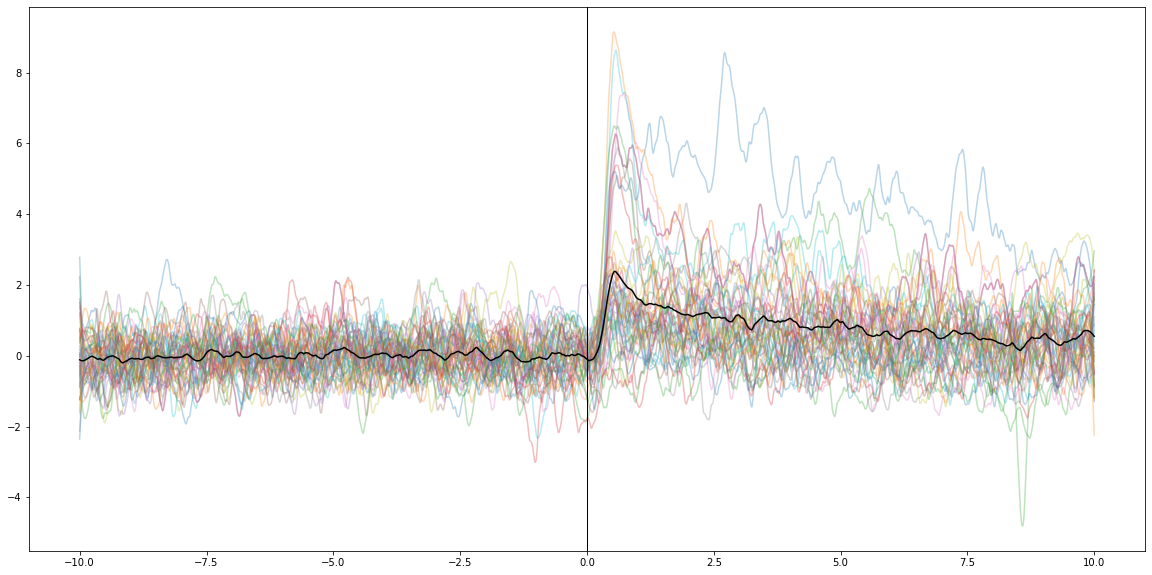

In [5]:
ana.plot('zscores')

In [6]:
ana.elements

{'HLED_OFF': [True, 'Drug Period', '#069AF3'],
 'HLED_ON': [True, 'No Drug Period', 'gold'],
 'TTL1_ON': [True, 'Fiber Photometry Recordings', 'g'],
 'np1': [True, 'Active Nosepokes', 'r'],
 'np2': [True, 'Inactive Nosepokes', 'b'],
 'inj1': [True, 'Injections', 'k'],
 'LED1_ON': [True, 'Conditioned Stimulus', 'goldenrod'],
 'LED1_OFF': [False, 'LED1_OFF', ['darkgray', 'darkgrey']],
 'LED2_OFF': [False, 'LED2_OFF', 'slategrey'],
 'LED2_ON': [True, ' Drug Light On', 'slategrey'],
 'DARK': [False, 'DARK', 'k'],
 'TO_DARK': [False, 'TO_DARK', 'olivedrab'],
 'NOTO_DARK': [False, 'NOTO_DARK', 'black'],
 'TIMEOUT': [True, 'Time outs', 'k'],
 'switch_d_nd': [False, 'Switch from D to ND', 'r'],
 'switch_to_nd': [False, 'Switch from TO to ND', 'r'],
 'switch_nd_d': [False, 'Switch from ND to D', 'b']}

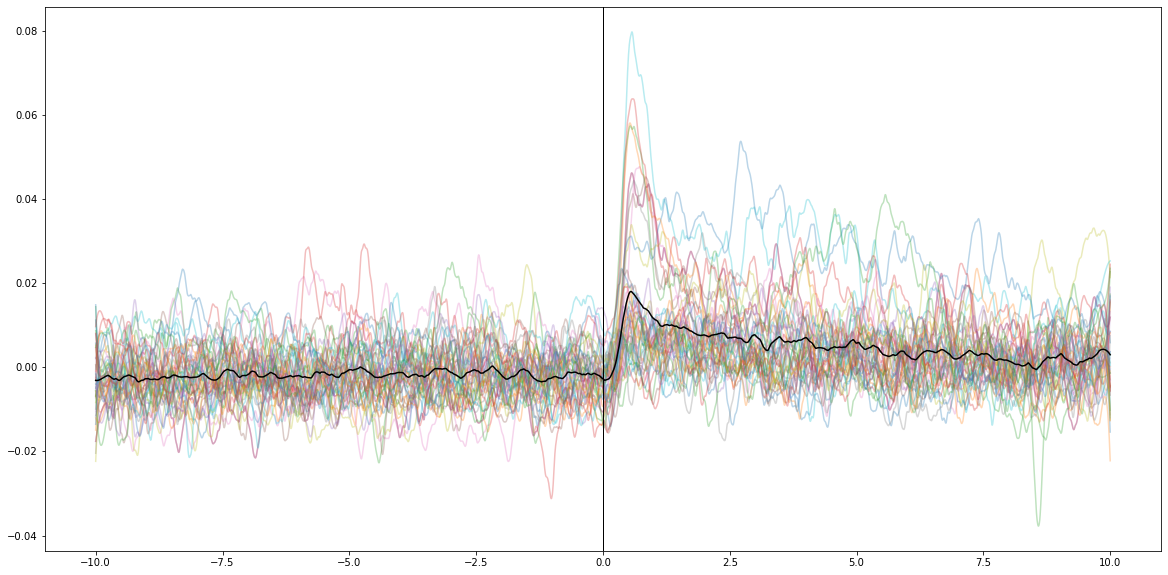

In [7]:
ana.plot('signal')

In [8]:
def plot_things(pre,post):
    n = len(pre)
    menMeans   = (pre.mean(),post.mean())
    menStd     = (pre.std()/np.sqrt(n),post.std()/np.sqrt(n))
    ind  = np.arange(2)    # the x locations for the groups
    width= 0.7
    labels = ('A', 'B')

    # Pull the formatting out here
    bar_kwargs = {'width':width,'color':'y','linewidth':2,'zorder':5}
    err_kwargs = {'zorder':0,'fmt':'none','linewidth':2,'ecolor':'k'}  #for matplotlib >= v1.4 use 'fmt':'none' instead

    fig, ax = plt.subplots()
    ax.p1 = plt.bar(ind, menMeans, **bar_kwargs)
    ax.errs = plt.errorbar(ind, menMeans, yerr=menStd, **err_kwargs)
    
    df = pd.DataFrame({'mean':menMeans,'standard dev':(pre.std(),post.std()),'SEM':menStd},index=['pre','post'])
    return df


,mean,standard dev,SEM
pre,8.280591e-18,4.112511e-17,6.063566e-18
post,8.419010e-01,9.172876e-01,1.352467e-01


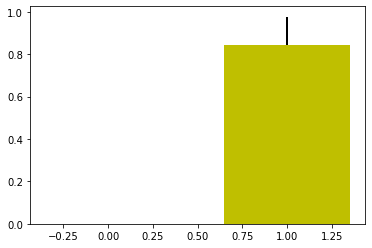

In [9]:
plot_things(np.array(ana.preAVG_Z),np.array(ana.postAVG_Z))

,mean,standard dev,SEM
pre,-0.018368,0.035592,0.005248
post,0.050321,0.063102,0.009304


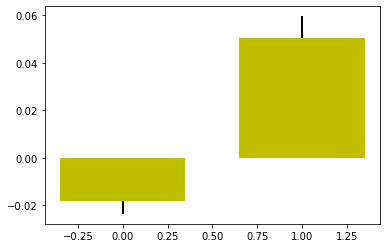

In [10]:
plot_things(np.array(analysis.preAUC),np.array(analysis.postAUC))

In [11]:
columns = ['preF','preA','postF','postA','NDNP','postAVGZ']
di = {k:[np.nan,np.nan,np.nan,np.nan,np.nan,np.nan] for k in ana.rat_sessions.keys()}
for k,v in ana.rat_sessions.items():
    T = v.behavior.timestamps('switch_dto_nd',interval='TTL1_ON')
    preF,preA,postF,postA,postAVGZ = [],[],[],[],[]
    for t in T:
        try:
            pre  = v.fiber.peakFA(t-10,t)
            post = v.fiber.peakFA(t,t+10)
            preF.append(pre['frequency'])
            preA.append(pre['mean dF/F'])
            postF.append(post['frequency'])
            postA.append(post['mean dF/F'])
            postAVGZ.append(v.analyze_perievent(t).postAVG_Z)
        except:
            print(f"didn't work for {k} at {t}")
    di[k][0] = np.mean(preF)
    di[k][1] = np.mean(preA)
    di[k][2] = np.mean(postF)
    di[k][3] = np.mean(postA)
    di[k][4] = len(v.behavior.timestamps('np1','HLED_ON'))
    di[k][5] = np.mean(postAVGZ)
df = pd.DataFrame.from_dict(di, orient='index',columns=columns)
df.dropna(inplace=True)

C:\Users\mceau\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\mceau\Anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,mean,standard dev,SEM
pre,2.151449,0.400148,0.083437
post,2.175362,0.390215,0.081365


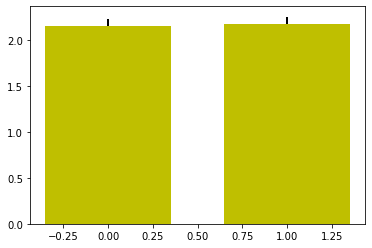

In [12]:
plot_things(df['preF'].values,df['postF'].values)

,mean,standard dev,SEM
pre,0.016903,0.004685,0.000977
post,0.026037,0.009996,0.002084


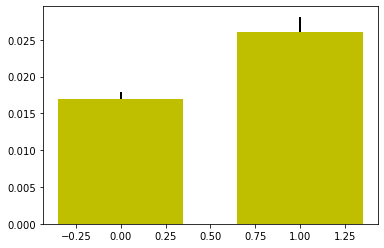

In [13]:
plot_things(df['preA'].values,df['postA'].values)

In [14]:
df

,preF,preA,postF,postA,NDNP,postAVGZ
rat_10_SA_1,2.300000,0.014061,1.850000,0.019818,2,0.413376
rat_11_SA_1,1.700000,0.020796,2.300000,0.017347,8,-0.294175
rat_11_SA_3,2.200000,0.015637,2.700000,0.017584,74,0.387274
rat_11_SA_4,1.500000,0.026897,1.800000,0.021984,170,-0.333041
rat_11_SA_5,2.250000,0.015337,2.500000,0.016737,2,0.126372
rat_11_SA_6,2.150000,0.017665,2.500000,0.018973,422,0.473535
rat_11_SA_8,2.800000,0.013393,2.100000,0.019301,1267,0.381101
rat_12_SA_2,2.133333,0.013188,2.833333,0.036352,5,1.841752
rat_12_SA_3,1.500000,0.012175,2.600000,0.032289,0,1.847958
rat_12_SA_5,1.650000,0.023576,1.150000,0.052478,15,1.859633


In [15]:
rats = list(set([i[:-5] for i in list(df.index)]))
dirat = {k:[] for k in rats}
for r in rats:
    l = []
    for i in df.index:
        if r in i:
            l.append(list(df.loc[i,:]))
    dirat[r] = np.mean(np.vstack(l),axis=0)
dfrats = pd.DataFrame.from_dict(dirat, orient='index',columns=columns)

In [16]:
dfrats

,preF,preA,postF,postA,NDNP,postAVGZ
rat_11,2.100000,0.018287,2.316667,0.018654,323.833333,0.123511
rat_8,2.116667,0.018364,2.216667,0.024311,33.666667,0.586457
rat_12,1.866667,0.016825,2.156667,0.042933,6.200000,2.109800
rat_5,2.440000,0.015009,2.290000,0.020933,83.800000,0.650355
rat_10,2.300000,0.014061,1.850000,0.019818,2.000000,0.413376
rat_3,2.233333,0.016908,1.800000,0.024946,4.333333,0.639603


<AxesSubplot:xlabel='NDNP', ylabel='postAVGZ'>

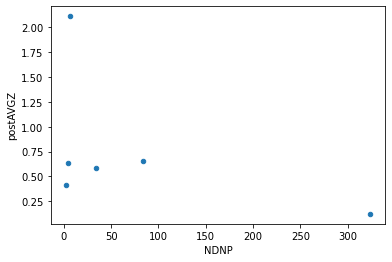

In [17]:
dfrats.plot(x='NDNP',y='postAVGZ',kind='scatter')

In [18]:
from scipy import stats

In [19]:
t_auc,p_auc = stats.ttest_ind(ana.preAUC,ana.postAUC)

In [143]:
for thing in ana.__dict__.keys():
    if 'pre' in thing:
        name = thing.split('pre')[1]
        a = ana.__dict__[thing]
        b = ana.__dict__['post'+name]
        if type(a[0]) == np.ndarray:
            a = [np.mean(i) for i in a]
            b = [np.mean(i) for i in b]
        t,p = stats.ttest_ind(a,b)
        message = ''
        if p < 0.05:
            message = 'youhou!!'
        if p < 0.01:
            message = 'double youhou!!'
        c,d = stats.norm.interval(0.68, loc=np.mean(a), scale=np.array(a).std()/np.sqrt(len(a)))
        interval = '['+str(round(c,4))+','+str(round(d,4))+']'
        print(f"{name:<10}: CI={interval:<21} t={t:<25} ; p={p:<25} {message}")    

_raw_sig  : CI=[0.1546,0.1589]       t=-0.21014114113238555      ; p=0.8340325178772686        
event     : CI=[-0.0024,-0.0013]     t=-6.359718069976346        ; p=8.212400890178525e-09     double youhou!!
_time     : CI=[3731.5637,4214.9689] t=-0.028776216807519687     ; p=0.977106783812001         
_zscores  : CI=[0.0,0.0]             t=-6.156894749028677        ; p=2.03112645069184e-08      double youhou!!
_Rzscores : CI=[-0.0026,0.0159]      t=-6.171826092099061        ; p=1.900812339307431e-08     double youhou!!
AVG_Z     : CI=[0.0,0.0]             t=-6.156894749028677        ; p=2.03112645069184e-08      double youhou!!
AVG_RZ    : CI=[-0.0026,0.0159]      t=-6.171826092099061        ; p=1.900812339307431e-08     double youhou!!
_raw_AUC  : CI=[1.5463,1.5884]       t=-0.21393655843008152      ; p=0.8310804663214789        
AUC       : CI=[-0.0236,-0.0131]     t=-6.360187716944105        ; p=8.195103321917311e-09     double youhou!!
Z_AUC     : CI=[-0.0006,0.0002]      t=-6.1573

In [144]:
ana.preAVG_Z

[2.8128702116688505e-17,
 3.7508029601324984e-17,
 0.0,
 -1.8752468077792334e-17,
 4.219305317503275e-17,
 1.8752468077792334e-17,
 0.0,
 1.8752468077792334e-17,
 1.8752468077792334e-17,
 0.0,
 -9.376234038896167e-18,
 -9.377007400331246e-18,
 2.344058509724042e-17,
 8.555813560492753e-17,
 8.555813560492753e-17,
 3.750493615558467e-17,
 5.625740423337701e-17,
 -1.8752468077792334e-17,
 7.500987231116934e-17,
 -2.578464360696446e-17,
 7.500987231116934e-17,
 -1.4064351058344252e-17,
 3.2816819136136587e-17,
 -4.219305317503275e-17,
 -7.501605920264997e-17,
 1.8752468077792334e-17,
 -9.376234038896167e-18,
 9.377007400331246e-18,
 4.688117019448084e-17,
 0.0,
 2.8128702116688505e-17,
 -1.8752468077792334e-17,
 0.0,
 -7.500987231116934e-17,
 0.0,
 3.750493615558467e-17,
 -2.8128702116688505e-17,
 -5.626204440198748e-17,
 4.688503700165623e-18,
 -1.1251480846675402e-16,
 -3.750493615558467e-17,
 2.1096526587516376e-17,
 2.3442518500828115e-17,
 5.625740423337701e-17,
 1.289232180348223e-1